In [1]:
#Import packages and upload data on active oil wells. active_wells.csv retrieved from 
#http://www.conservation.ca.gov/dog/maps/Pages/GISMapping2.aspx in October, 2017. And reformatted to only include
#the columns titled 'OBJECTID', 'API', 'County', 'Latitude', 'Longitude', 'Elevation'.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

active_wells_full = pd.read_csv("/Users/DrQ/Documents/Doezema Research/data/active_wells.csv")

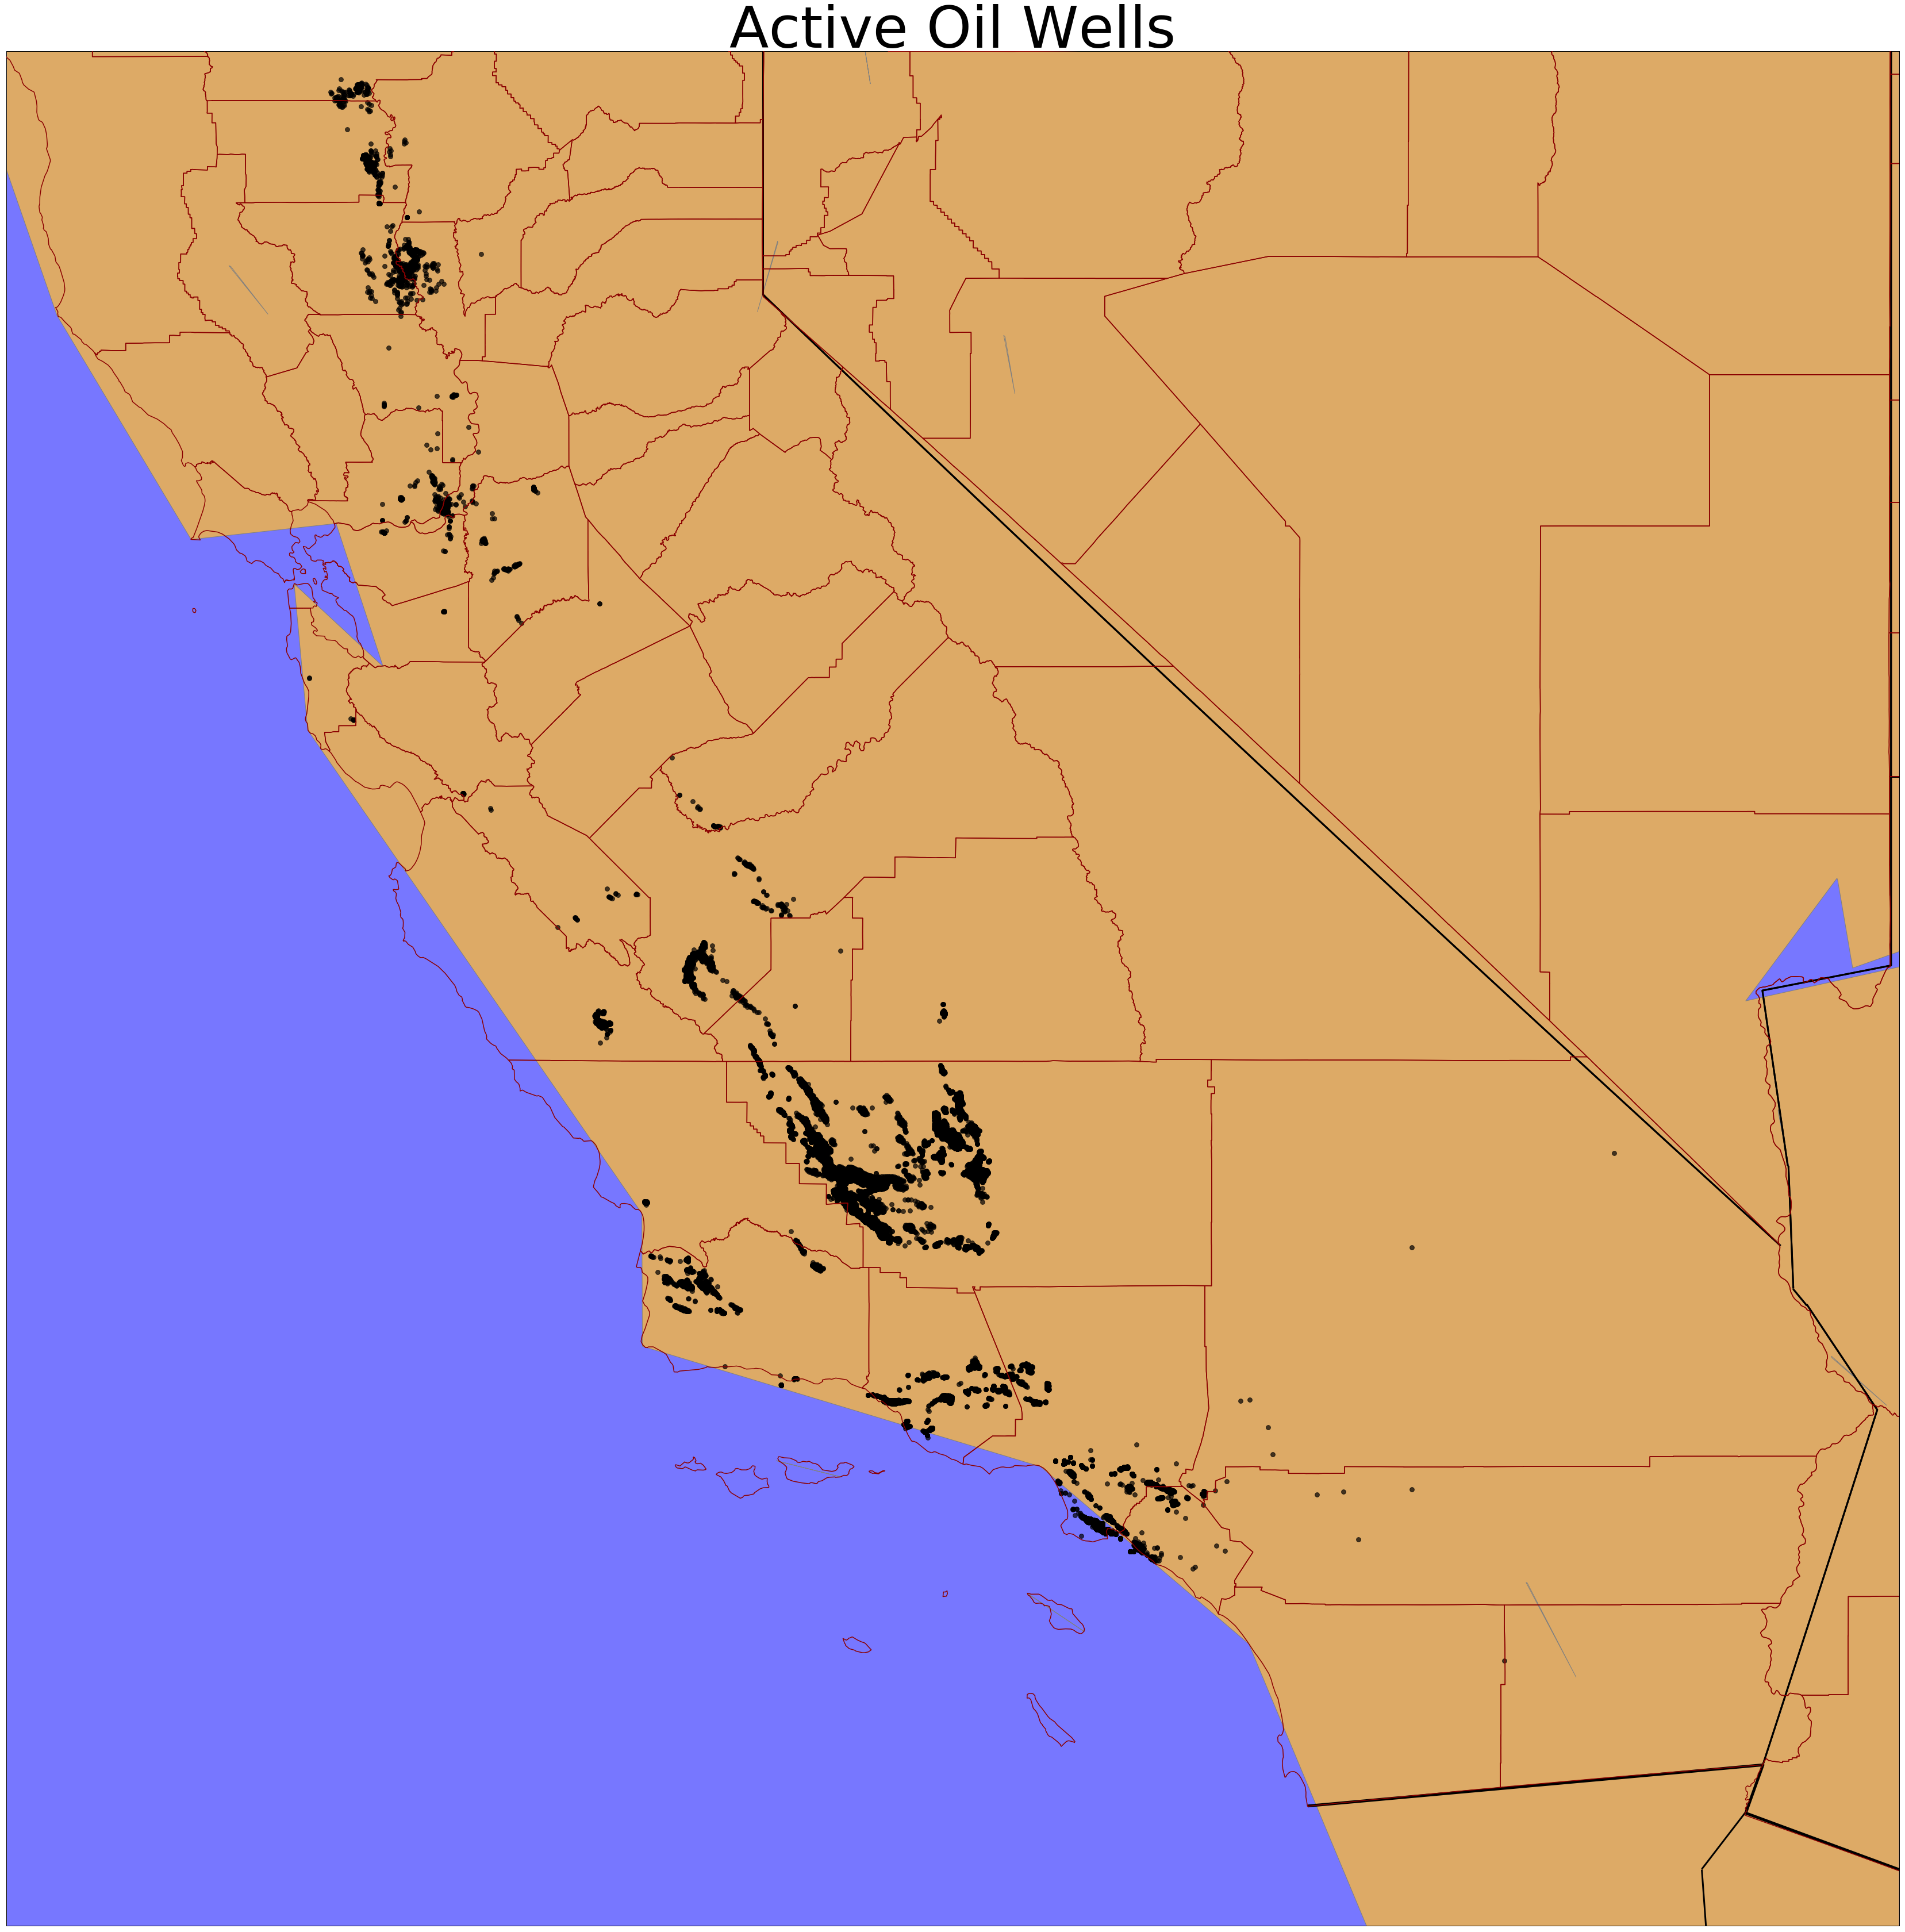

In [2]:
#Use Basemap to plot the active oil wells in CA using 'Longitude' and 'Latitude'

plt.figure(figsize=(120,60))
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'c', area_thresh = 0.1,
    llcrnrlon=-124, llcrnrlat=32.0,
    urcrnrlon=-114, urcrnrlat=40.0)
 
map.drawcoastlines(color='gray')
map.drawcountries(linewidth=5)
map.fillcontinents(color='#ddaa66',lake_color='#7777ff')
map.drawmapboundary(fill_color='#7777ff')
map.drawstates(linewidth=3)
map.drawcounties(color='darkred', zorder=20, linewidth=1.5)
 
lon = active_wells_full['Longitude'].tolist()
lat = active_wells_full['Latitude'].tolist()

x,y = map(lon, lat)
map.scatter(x, y, c='black', s=60, zorder=10, alpha=0.7)

plt.title('Active Oil Wells', fontsize=100)


plt.show()

In [3]:
#Upload collected data and create DataFrame with necessary data for Ethane and Methane i.e. (CH4)

data_full = pd.read_csv("/Users/DrQ/Documents/Doezema Research/data/CollectedData.csv")
data_full['date'] = pd.to_datetime(data_full['date'])

data_full = data_full.drop(data_full.index[2513:])

methan_ethane_columns = ['SARP Year', 'date', 'Latitude', 'Longitude', 'AltP_feet', 'CH4 (ppmv)', 'Ethane (E)']
methane_ethane = pd.DataFrame(data_full, columns=methan_ethane_columns)
methane_ethane['date'] = pd.to_datetime(methane_ethane['date'])


methane_ethane_list = ['CH4 (ppmv)', 'Ethane (E)']
for halocarbon in methane_ethane_list:
        methane_ethane[halocarbon] = methane_ethane[halocarbon].apply(pd.to_numeric, errors = 'coerce')
        
        
methane_ethane.describe()

SARP Year     Latitude    Longitude     AltP_feet   CH4 (ppmv)  \
count  2513.000000  2487.000000  2479.000000   2460.000000  2511.000000   
mean   2013.188221    35.228815  -118.952374   5876.904472     1.899996   
std       2.536201     1.317491     1.277222   6581.452036     0.094511   
min    2009.000000    32.722000  -122.770000     13.000000     1.763000   
25%    2011.000000    34.012000  -119.850226   1478.250000     1.839000   
50%    2013.000000    35.041670  -119.053330   3128.500000     1.875000   
75%    2015.000000    36.221000  -118.061200   7636.750000     1.934000   
max    2017.000000    39.545000  -111.340000  36987.000000     2.756000   

         Ethane (E)  
count   2513.000000  
mean    1160.424477  
std     1044.196186  
min      268.630000  
25%      669.000000  
50%      858.000000  
75%     1279.480000  
max    13790.000000

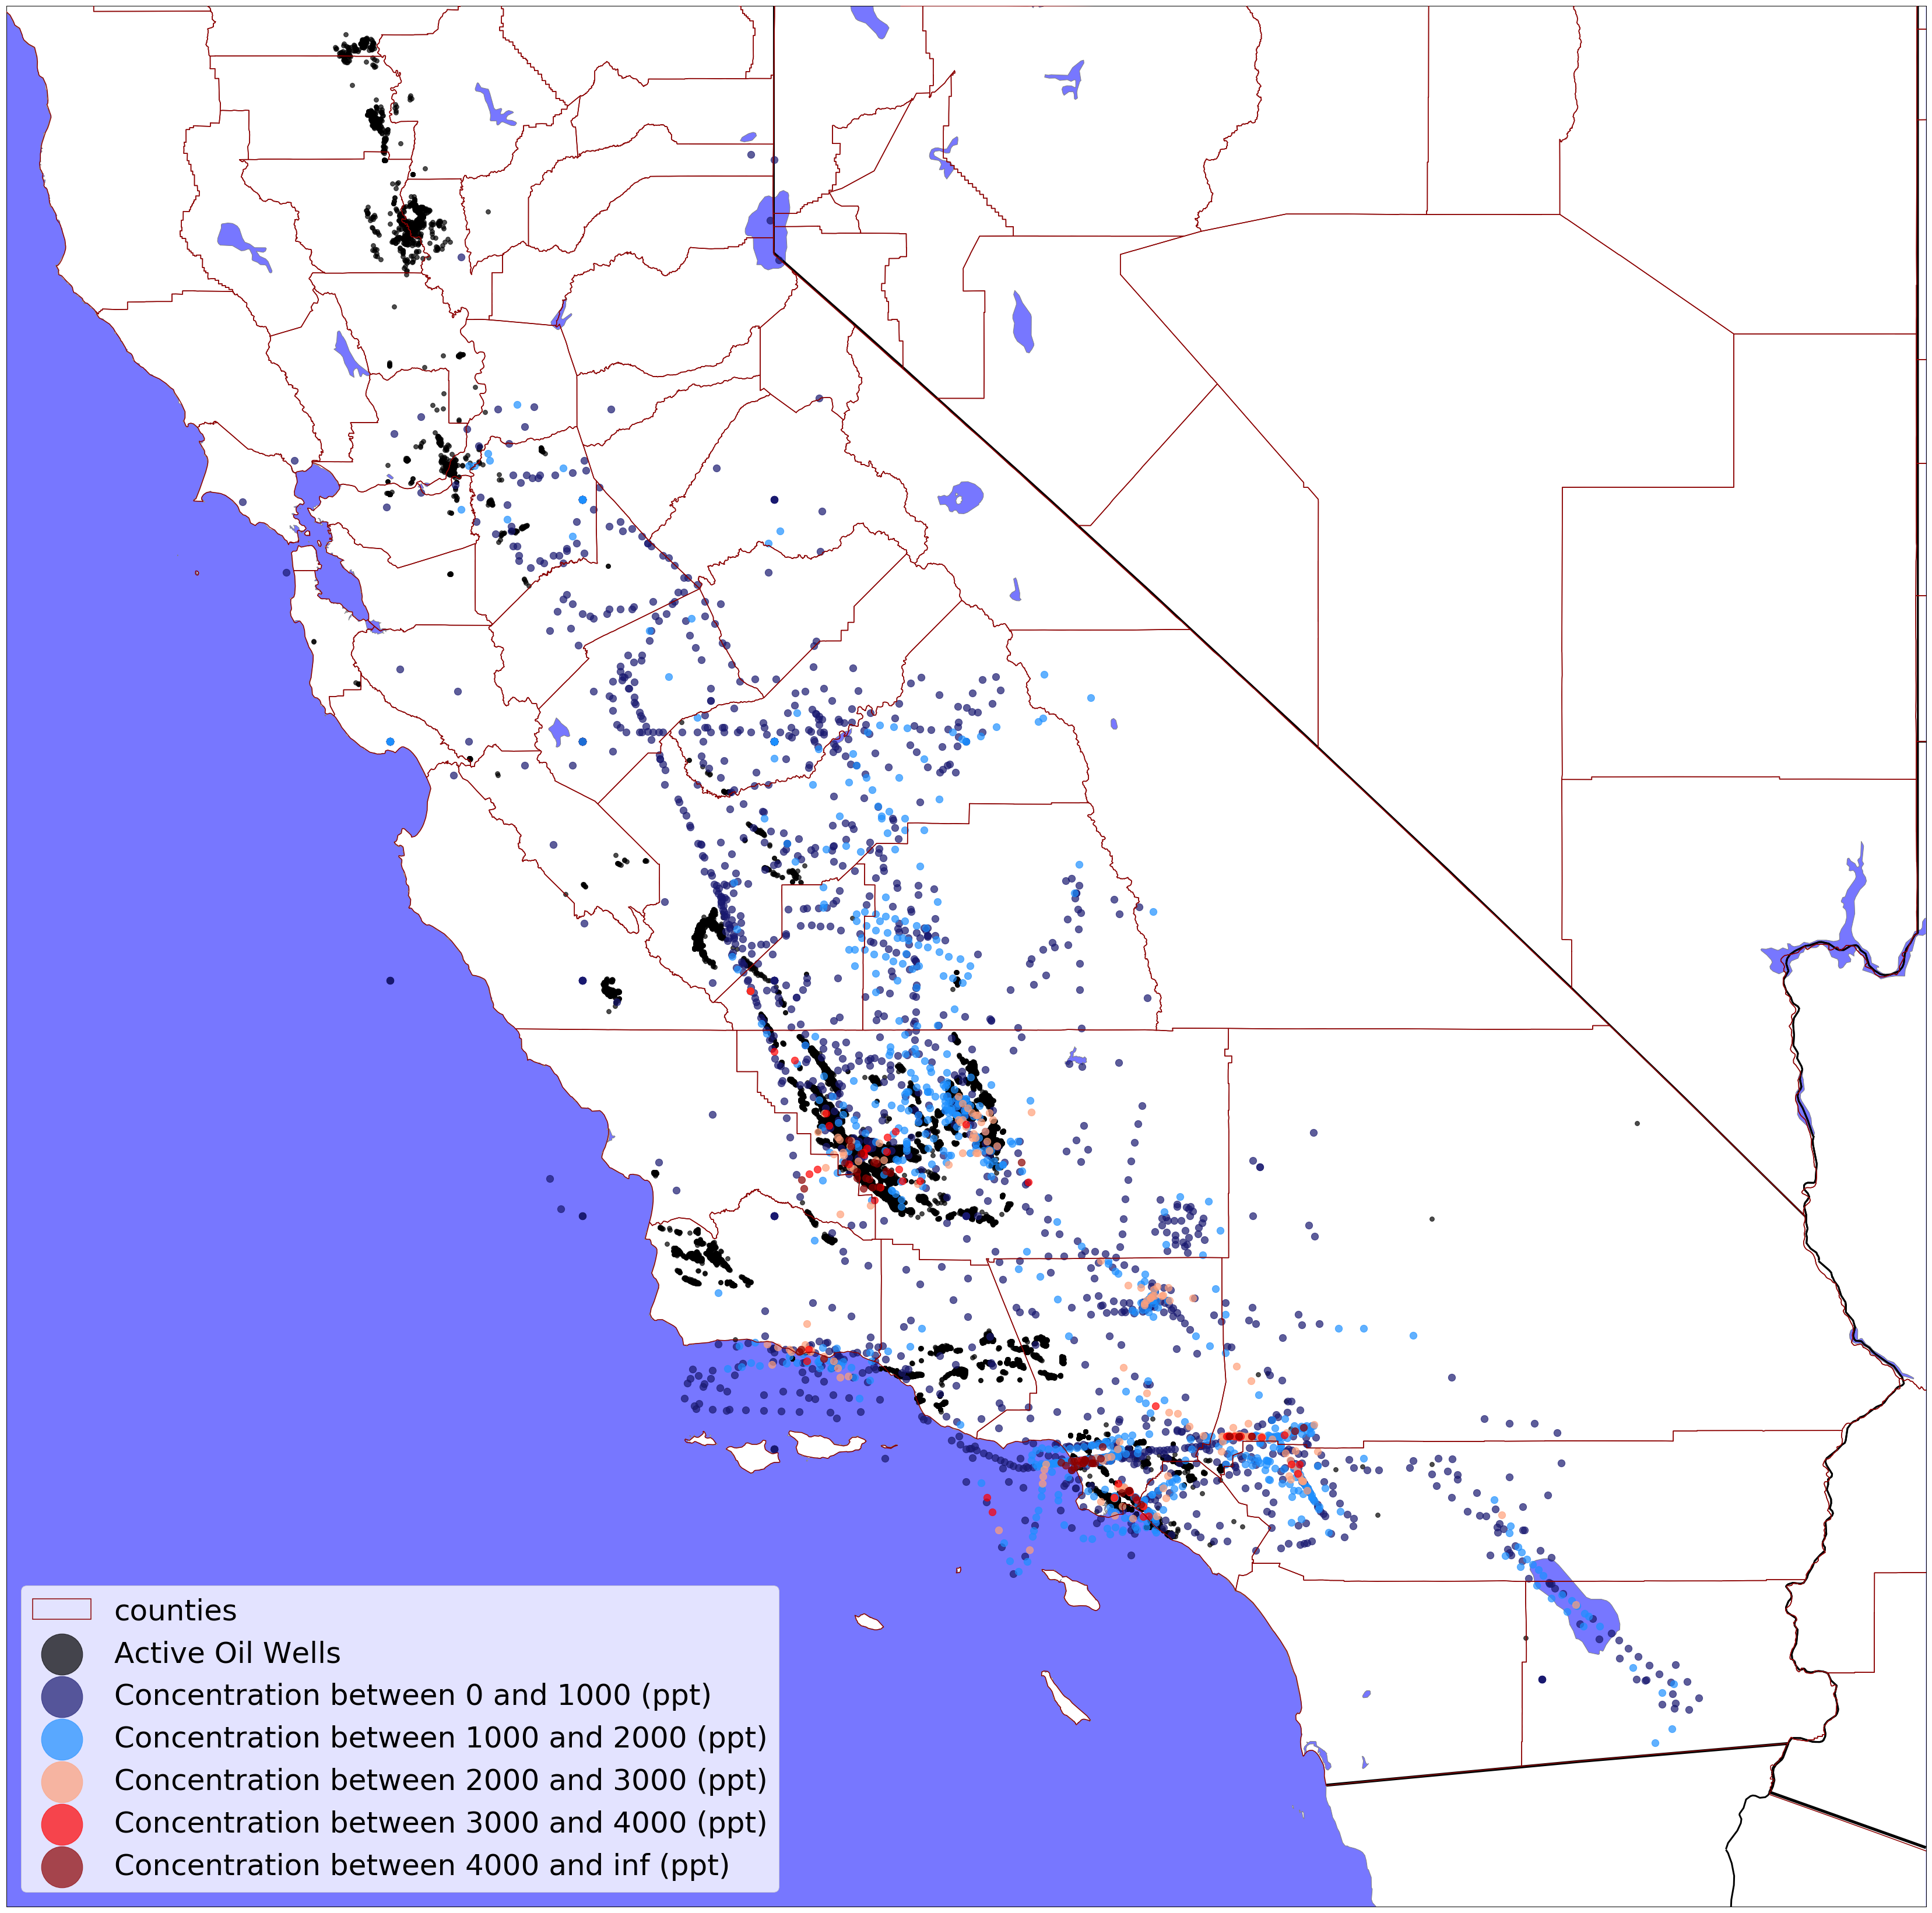

In [4]:
#Plot concentration of of Ethane (in ppt) vs. the location of the active oil wells

import matplotlib.cm as cm
import itertools
import math
 
colors = itertools.cycle(["midnightblue", "dodgerblue", 'lightsalmon', "red", 'darkred', 'y', 'darkblue', 'teal'])

plt.figure(figsize=(120,60))
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-124, llcrnrlat=32.0,
    urcrnrlon=-114, urcrnrlat=40.0)
    
map.drawcoastlines(color='gray')
map.drawcountries(linewidth=5)
map.fillcontinents(color='white',lake_color='#7777ff')
map.drawmapboundary(fill_color='#7777ff')
map.drawstates(linewidth=3)
map.drawcounties(color='darkred', zorder=20, linewidth=1.5)

lon = active_wells_full['Longitude'].tolist()
lat = active_wells_full['Latitude'].tolist()

x,y = map(lon, lat)
map.scatter(x, y, c='black', s=60, zorder=10, alpha=0.7, label='Active Oil Wells')

values = [0,1000,2000,3000,4000,math.inf]

for i, item in enumerate(values):
    if i > 0:
        map_by_category = methane_ethane[values[i-1]<= methane_ethane['Ethane (E)']]
        map_by_category = map_by_category[map_by_category['Ethane (E)'] <= item]
        lon = map_by_category['Longitude'].tolist()
        lat = map_by_category['Latitude'].tolist()
        x,y = map(lon, lat)
        map.scatter(x, y, color=next(colors), s=150, zorder=10, alpha=0.7, label='Concentration between '+str(values[i-1])+' and '+str(item) + ' (ppt)')
    
lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=50)
for i in range(1,7):
    lgnd.legendHandles[i]._sizes = [5000]
  
plt.show()

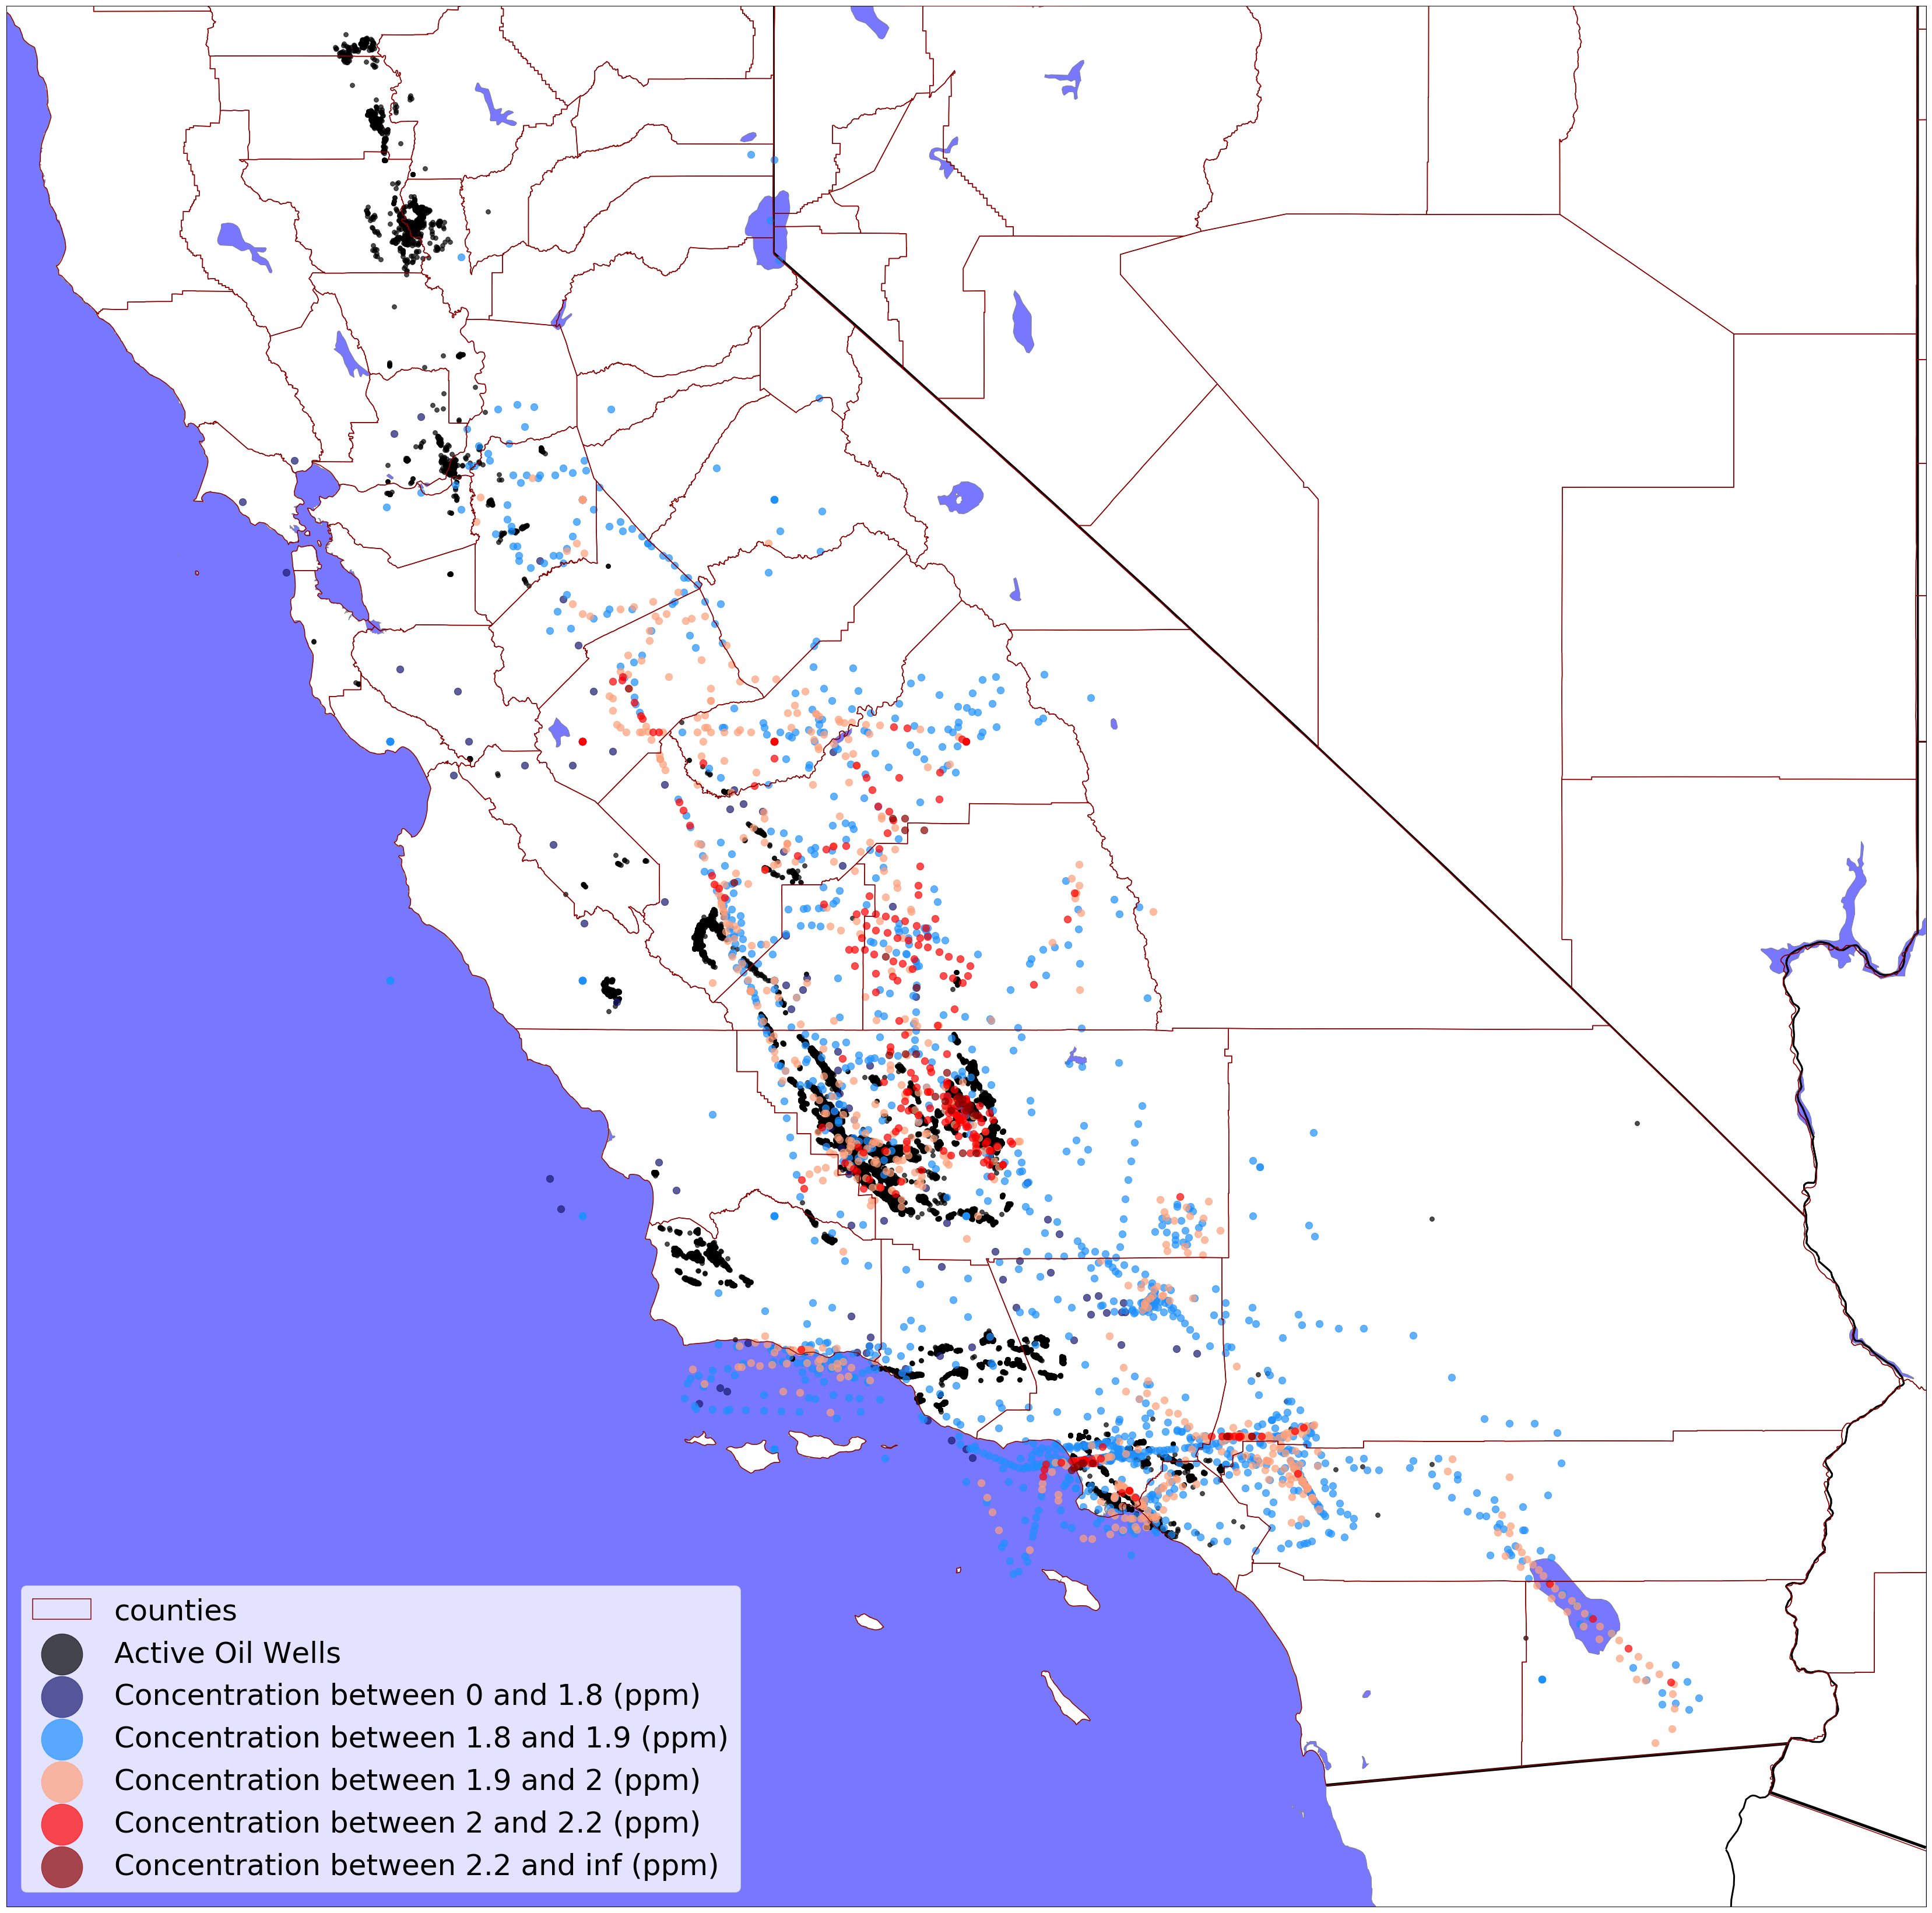

In [5]:
#Plot concentration of of Methane (in ppm) vs. the location of the active oil wells

colors = itertools.cycle(["midnightblue", "dodgerblue", 'lightsalmon', "red", 'darkred', 'y', 'darkblue', 'teal'])

plt.figure(figsize=(120,60))
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-124, llcrnrlat=32.0,
    urcrnrlon=-114, urcrnrlat=40.0)
    
map.drawcoastlines(color='gray')
map.drawcountries(linewidth=5)
map.fillcontinents(color='white',lake_color='#7777ff')
map.drawmapboundary(fill_color='#7777ff')
map.drawstates(linewidth=3)
map.drawcounties(color='darkred', zorder=20, linewidth=1.5)

lon = active_wells_full['Longitude'].tolist()
lat = active_wells_full['Latitude'].tolist()

x,y = map(lon, lat)
map.scatter(x, y, c='black', s=60, zorder=10, alpha=0.7, label='Active Oil Wells')

values = [0,1.8,1.9,2,2.2,math.inf]

for i, item in enumerate(values):
    if i > 0:
        map_by_category = methane_ethane[values[i-1]<= methane_ethane['CH4 (ppmv)']]
        map_by_category = map_by_category[map_by_category['CH4 (ppmv)'] <= item]
        lon = map_by_category['Longitude'].tolist()
        lat = map_by_category['Latitude'].tolist()
        x,y = map(lon, lat)
        map.scatter(x, y, color=next(colors), s=150, zorder=10, alpha=0.7, label='Concentration between '+str(values[i-1])+' and '+str(item) + ' (ppm)')
    
lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=50)
for i in range(1,7):
    lgnd.legendHandles[i]._sizes = [5000]
  
plt.show()

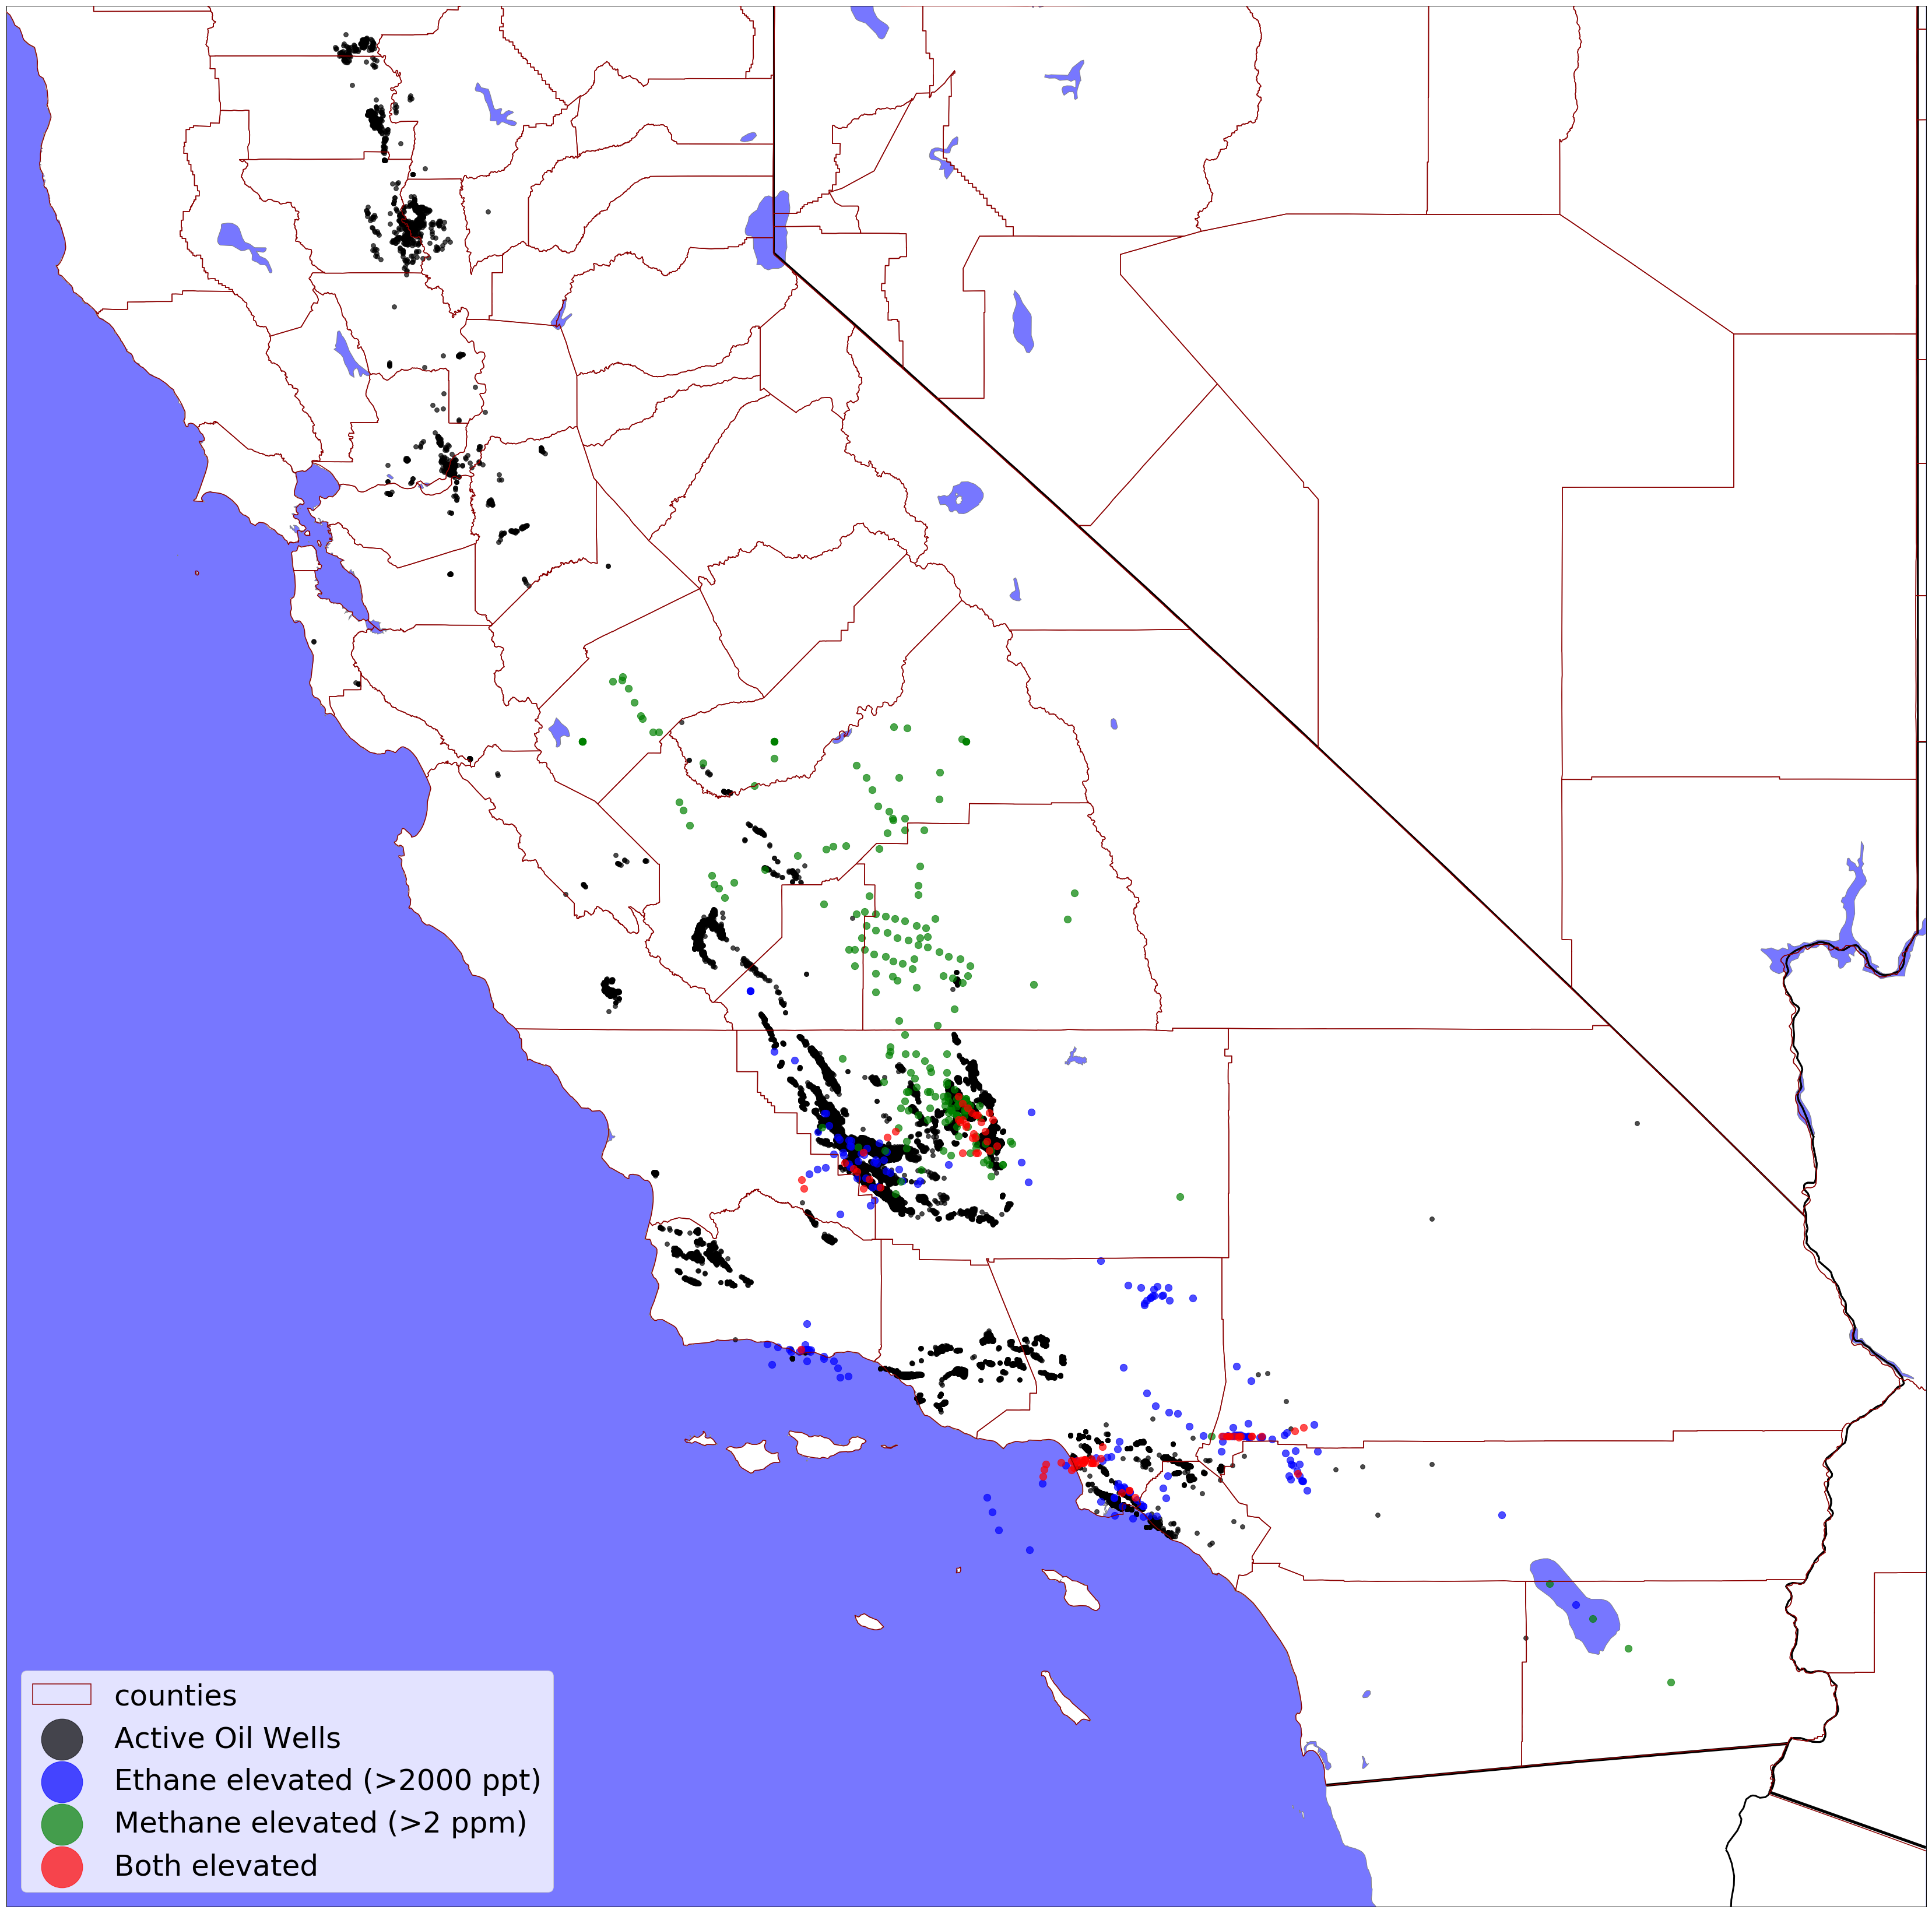

In [6]:
#Plot locations of elevated ethane (>2000ppt) and elevated methane (>2ppm) vs. the location of the active oil wells

ethane_elevated = methane_ethane[methane_ethane['Ethane (E)'] >= 2000]
ethane_elevated_only = ethane_elevated[ethane_elevated['CH4 (ppmv)'] < 2]
methane_elevated = methane_ethane[methane_ethane['CH4 (ppmv)'] >= 2]
methane_elevated_only = methane_elevated[methane_elevated['Ethane (E)'] < 2000]
both_elevated = ethane_elevated[ethane_elevated['CH4 (ppmv)'] >= 2]

plt.figure(figsize=(120,60))
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-124, llcrnrlat=32.0,
    urcrnrlon=-114, urcrnrlat=40.0)
    
map.drawcoastlines(color='gray')
map.drawcountries(linewidth=5)
map.fillcontinents(color='white',lake_color='#7777ff')
map.drawmapboundary(fill_color='#7777ff')
map.drawstates(linewidth=3)
map.drawcounties(color='darkred', zorder=20, linewidth=1.5)

lon = active_wells_full['Longitude'].tolist()
lat = active_wells_full['Latitude'].tolist()

x,y = map(lon, lat)
map.scatter(x, y, c='black', s=60, zorder=10, alpha=0.7, label='Active Oil Wells')


lon = ethane_elevated_only['Longitude'].tolist()
lat = ethane_elevated_only['Latitude'].tolist()
x,y = map(lon, lat)
map.scatter(x, y, color='b', s=150, zorder=10, alpha=0.7, label='Ethane elevated (>2000 ppt)')

lon = methane_elevated_only['Longitude'].tolist()
lat = methane_elevated_only['Latitude'].tolist()
x,y = map(lon, lat)
map.scatter(x, y, color='g', s=150, zorder=10, alpha=0.7, label='Methane elevated (>2 ppm)')

lon = both_elevated['Longitude'].tolist()
lat = both_elevated['Latitude'].tolist()
x,y = map(lon, lat)
map.scatter(x, y, color='r', s=150, zorder=10, alpha=0.7, label='Both elevated')


lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=50)
for i in range(1,5):
    lgnd.legendHandles[i]._sizes = [5000]
  
plt.show()